In [1]:
# importing pandas
import pandas as pd

# csv file location
url = 'https://dq-content.s3.amazonaws.com/291/f500.csv'

# making data frame from csv file
data = pd.read_csv(url, index_col = 'company')


# Boolean Indexing

Boolean indexing refers to filtering data in a `DataFrame` through the creation of a boolean array of equal dimension to the `DataFrame` being filtered.

<br><br>
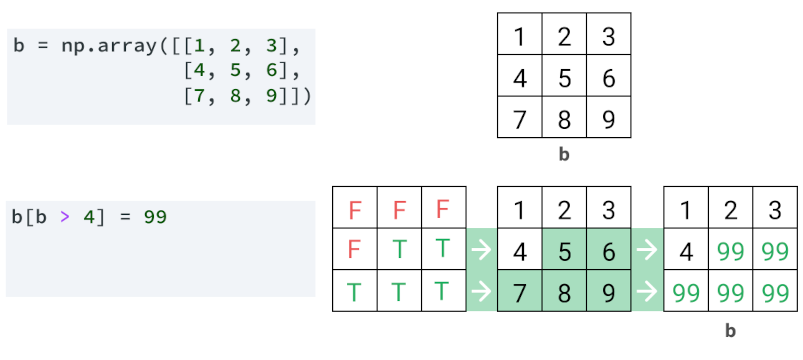
<br><br>

# Single conditional

In [ ]:
# set boolean array to filter data
data_filter = data['sector'] == 'Technology'

# filter data using boolean indexing
data_filtered = data[data_filter]

# data selection
data_selection = data_filtered[['country']]

data_selection

,country
company,
Apple,USA
Samsung Electronics,South Korea
Amazon.com,USA
Hon Hai Precision Industry,Taiwan
Alphabet,USA
Microsoft,USA
Hitachi,Japan
IBM,USA
Huawei Investment & Holding,China


# Multiple conditional with **`AND`**

Use **`&`** operator for boolean operator `AND`.

In [ ]:
# set boolean array to filter data
data_filter = (data['sector'] == 'Technology') & (data['revenues'] > 50000)

# filter data using boolean indexing
data_filtered = data[data_filter]

# data selection
data_selection = data_filtered[['country']]

data_selection

,country
company,
Apple,USA
Samsung Electronics,South Korea
Amazon.com,USA
Hon Hai Precision Industry,Taiwan
Alphabet,USA
Microsoft,USA
Hitachi,Japan
IBM,USA
Huawei Investment & Holding,China


# Multiple conditional with **`OR`**

Use **`|`** operator for boolean operator `OR`.

In [ ]:
# set boolean array to filter data
data_filter = (data['sector'] == 'Technology') | (data['sector'] == 'Telecommunications')

# filter data using boolean indexing
data_filtered = data[data_filter]

# data selection
data_selection = data_filtered[['country']]

data_selection

,country
company,
Apple,USA
Samsung Electronics,South Korea
AT&T,USA
Amazon.com,USA
Hon Hai Precision Industry,Taiwan
...,...
Altice,Netherlands
Onex,Canada
Tencent Holdings,China


# Add a new column based on a condition

We want to add a new column named `performance` that will have one of two possible values as follows:

* `positive`: if the field `revenue_change` is positive,
* `negative`: if the field `revenue_change` is negative.

To do that, we will use the numpy method `numpy.where()`.

In [ ]:
import numpy as np

# add a new column
data['performance'] = np.where(data['revenue_change'] > 0, 'positive', 'negative')

# show dataframe
data

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,performance
company,,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,positive
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,negative
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,negative
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,negative
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337,positive
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507,negative
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111,negative


# Add a new column based on multiple conditions

We want to add a new column named `size` that will have one of four possible values as follows:

* `huge`: if the field `employees` is greater than 1 000 000
* `big`: if the field `employees` is between 500 000 and 1 000 000
* `medium`: if the field `employees` is between 100 000 and 500 000
* `small`: if the field `employees` is lower than 100 000.


To do that, we will use the numpy method `numpy.select()`.

In [ ]:
# set conditions
conditions = [
    data['employees'] > 1000000,
    (data['employees'] <= 1000000) & (data['employees'] > 500000),
    (data['employees'] <= 500000) & (data['employees'] > 100000),
    data['employees'] <= 100000
]

# set values
values = ['huge', 'big', 'medium', 'small']

# add a new column
data['size'] = np.select(conditions, values, 'unknown')

# show dataframe
data

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,performance,size
company,,,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,positive,huge
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,negative,big
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,negative,big
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,negative,huge
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,positive,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337,positive,small
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507,negative,small
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111,negative,small


# Indexing by **`isin()`** method

Another means of boolean indexing is the **`Series.isin()`** method.

This returns a boolean `Series` showing whether each element in the `Series` exactly matched an element in the sequence of values passed to the function.

Since this works on a `Series` we generally apply the method to a column with one or more acceptable values as input.

In [ ]:
# set boolean array to filter data
data_filter = data['sector'].isin(['Technology', 'Telecommunications'])

# filter data using boolean indexing
data_filtered = data[data_filter]

# data selection
data_selection = data_filtered[['country']]

data_selection

,country
company,
Apple,USA
Samsung Electronics,South Korea
AT&T,USA
Amazon.com,USA
Hon Hai Precision Industry,Taiwan
...,...
Altice,Netherlands
Onex,Canada
Tencent Holdings,China


# Indexing by **`isna()`** method

A dataset may have entries that are `NA`. These are values such as `None`, `numpy.NaN`, or `numpy.NaT`.

We can quickly filter these out using the **`Series.isna()`** method.

In [ ]:
# filter data frame using boolean indexing
data_selection = data[data['profits'].isna()]

data_selection

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Heraeus Holding,457,23793,65.9,NaN,4982,NaN,Jan Rinnert,Metals,Materials,0,Germany,"Hanau, Germany",http://www.heraeus.com,7,12369,3160


# The **`query()`** method

The **`pandas.query()`** method allows to query the columns of a `DataFrame` with a boolean expression.

> *Syntax*
<font size="4">
```python
DataFrame.query(expr, inplace=False)
```
</font>

*Parameters*:
* `expr` : `str`, the query string to evaluate. Expression in string form to filter data.
* `inplace` : `bool`, whether to modify the DataFrame rather than creating a new one. Make changes in the original DataFrame if `True`.

*Returns*:
* `DataFrame` or `None`. DataFrame resulting from the provided query expression or `None` if `inplace=True`.

`DataFrame.query()` method only works if the column name doesn’t have any empty spaces. So before applying the method, spaces in column names need to be replaced, for example with an underscore character '_' .

**Example:** replace blank spaces in columns names with underscore character '_'

In [ ]:
# replacing blank spaces with '_'
data.columns = [column.replace(" ", "_") for column in data.columns]

# data selection
data_selection = data.query('sector == "Technology"')

data_selection['country']

,country
company,
Apple,USA
Samsung Electronics,South Korea
Amazon.com,USA
Hon Hai Precision Industry,Taiwan
Alphabet,USA
Microsoft,USA
Hitachi,Japan
IBM,USA
Huawei Investment & Holding,China


# Duplicates

The pandas `duplicated()` method allows to find duplicate values in one or more columns.

**Example:** find the company that has the largest profits in each sector:

Let's first select and sort data by sector and profits,

and then find duplicate values in the sector column:

In [2]:
# select data
data_selected = data[['sector', 'profits']]

# set sort attributes
sort_by = ['sector', 'profits']
sort_direction_list = [True, False]

# sort data
data_sorted = data_selected.sort_values(by=sort_by, ascending=sort_direction_list)

# show dataframe
data_sorted

,sector,profits
company,,
Lockheed Martin,Aerospace & Defense,5302.0
United Technologies,Aerospace & Defense,5055.0
Boeing,Aerospace & Defense,4895.0
General Dynamics,Aerospace & Defense,2955.0
Raytheon,Aerospace & Defense,2211.0
...,...,...
Rajesh Exports,Wholesalers,185.8
Tewoo Group,Wholesalers,141.7
Phoenix Pharmahandel,Wholesalers,135.4


Now, let's use the pandas `duplicated()` method to find duplicate values in the sector column:

In [3]:
# duplicates in column named sector as boolean
data_duplicates_bool = data_sorted.duplicated('sector')

# show dataframe
data_duplicates_bool

,0
company,
Lockheed Martin,False
United Technologies,True
Boeing,True
General Dynamics,True
Raytheon,True
...,...
Rajesh Exports,True
Tewoo Group,True
Phoenix Pharmahandel,True


Note that all the rows in a given sector have the boolean value `True` except for the first, which corresponds to the company that has the largest profits.

So, to keep only the first element in each sector, we will use a boolean indexing and use the logical `NOT` operator which is performed in pandas using the tilde symbol (`~`).

In [4]:
# set a boolean filter, use logical NOT operator ~
data_filter = ~data_duplicates_bool

# filter data to keep only the first element of each sector
data_filtered = data_sorted[data_filter]

# show dataframe
data_filtered

,sector,profits
company,,
Lockheed Martin,Aerospace & Defense,5302.0
Nike,Apparel,3760.0
TUI,Business Services,1151.7
SABIC,Chemicals,4757.1
Gazprom,Energy,14222.6
Pacific Construction Group,Engineering & Construction,3168.1
Industrial & Commercial Bank of China,Financials,41883.9
Walgreens Boots Alliance,Food & Drug Stores,4173.0
Nestle,"Food, Beverages & Tobacco",8659.2


# Unique

The `unique()` method in Pandas is used to extract the distinct elements from a Series or a column of a DataFrame.

It returns a NumPy array containing these unique values, preserving the order of their first appearance.

**Example:** get the distinct values from the `sector` column:

In [6]:
# get unique values using the unique() method
datd_unique_values = data['sector'].unique()

# show dataframe
datd_unique_values

array(['Retailing', 'Energy', 'Motor Vehicles & Parts', 'Financials',
       'Technology', 'Wholesalers', 'Health Care', 'Telecommunications',
       'Engineering & Construction', 'Industrials', 'Food & Drug Stores',
       'Aerospace & Defense', 'Food, Beverages & Tobacco',
       'Household Products', 'Transportation', 'Materials', 'Chemicals',
       'Media', 'Apparel', 'Hotels, Restaurants & Leisure',
       'Business Services'], dtype=object)